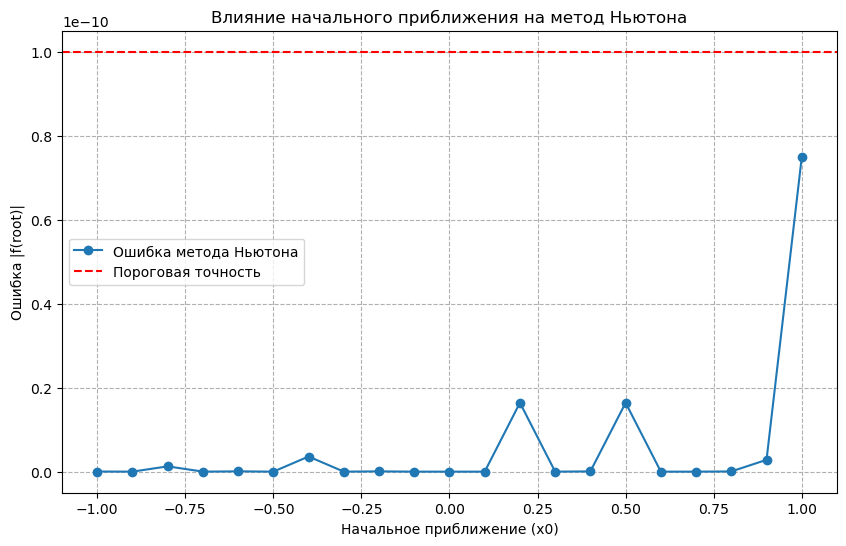

In [1]:
import math
import matplotlib.pyplot as plt

# Реализация метода Ньютона
def newton_method(f, df, x0, tolerance=1e-10, max_iterations=100):
    x = x0
    for i in range(max_iterations):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tolerance:
            return x
        if dfx == 0:
            raise ValueError("Производная равна нулю, метод Ньютона не сходится.")
        x -= fx / dfx
    return x  # Возврат последнего приближения, если метод не сошелся

# График зависимости ошибки от начального приближения
def plot_newton():
    alpha = 1e-10  # Малое значение α для проверки ошибок округления
    a, b, c = 3, 2, 2 + alpha

    # Функция уравнения и её производная
    f = lambda x: 3 * x**3 + 2 * x**2 + 2 * x + alpha
    df = lambda x: 9 * x**2 + 4 * x + 2

    # Диапазон начальных приближений
    initial_guesses = [i * 0.1 for i in range(-10, 11)]  # От -1 до 1 с шагом 0.1
    errors = []

    for x0 in initial_guesses:
        root_newton = newton_method(f, df, x0)
        error = abs(f(root_newton))
        errors.append(error)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(initial_guesses, errors, label="Ошибка метода Ньютона", marker="o")
    plt.xlabel("Начальное приближение (x0)")
    plt.ylabel("Ошибка |f(root)|")
    plt.title("Влияние начального приближения на метод Ньютона")
    plt.axhline(1e-10, color="red", linestyle="--", label="Пороговая точность")
    plt.grid(True, linestyle="--")
    plt.legend()
    plt.show()

# Запуск графика
plot_newton()


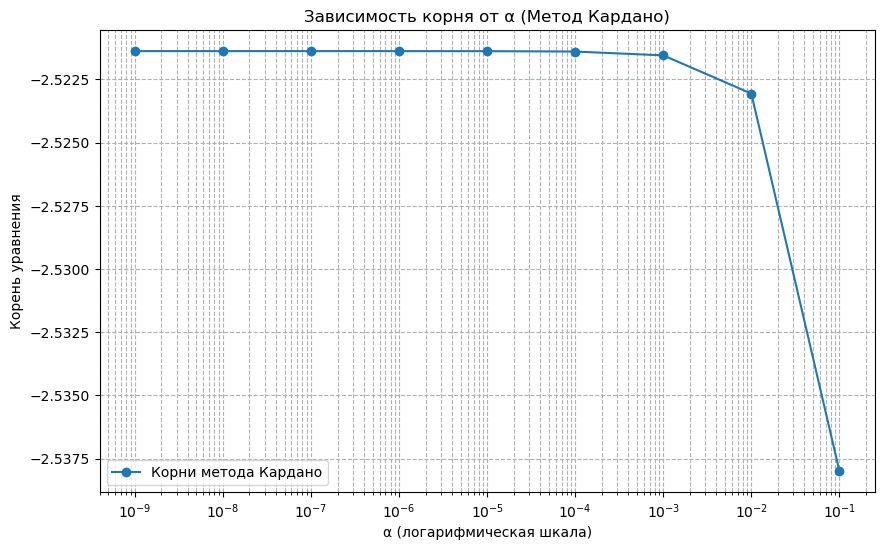

In [5]:
import math
import matplotlib.pyplot as plt

# Реализация метода Кардано
def cardano_method(a, b, c):
    # Преобразование уравнения к приведенной форме
    p = b - (a**2) / 3
    q = c - a * b / 3 + 2 * (a**3) / 27
    discriminant = (q / 2)**2 + (p / 3)**3

    if discriminant >= 0:
        # Один действительный корень
        s1 = math.copysign(abs(-q / 2 + math.sqrt(discriminant))**(1/3), -q / 2 + math.sqrt(discriminant))
        s2 = math.copysign(abs(-q / 2 - math.sqrt(discriminant))**(1/3), -q / 2 - math.sqrt(discriminant))
        y = s1 + s2
        return y - a / 3
    else:
        # Три действительных корня
        r = math.sqrt(-(p / 3)**3)
        phi = math.acos(-q / (2 * r))
        r_cbrt = (-p / 3)**0.5

        y1 = 2 * r_cbrt * math.cos(phi / 3)
        return y1 - a / 3  # Возьмем только первый корень для примера

# График зависимости корня от α
def plot_cardano():
    alpha_values = [10**(-i) for i in range(1, 10)]  # Значения α от 10^(-1) до 10^(-9)
    roots = []

    for alpha in alpha_values:
        a, b, c = 3, 2, 2 + alpha
        root = cardano_method(a, b, c)
        roots.append(root)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, roots, label="Корни метода Кардано", marker="o")
    plt.xscale("log")
    plt.yscale("linear")
    plt.xlabel("α (логарифмическая шкала)")
    plt.ylabel("Корень уравнения")
    plt.title("Зависимость корня от α (Метод Кардано)")
    plt.grid(True, which="both", linestyle="--")
    plt.legend()
    plt.show()

# Запуск графика
plot_cardano()


 x    erf через интеграл   erf табличное     Error
 0.0   0.00000000   0.00000000   0.00e+00
 0.1   0.11246292   0.11246292   1.86e-10
 0.2   0.22270259   0.22270259   1.45e-09
 0.3   0.32862675   0.32862676   4.64e-09
 0.4   0.42839234   0.42839236   1.03e-08
 0.5   0.52049986   0.52049988   1.83e-08
 0.6   0.60385606   0.60385609   2.83e-08
 0.7   0.67780115   0.67780119   3.95e-08
 0.8   0.74210091   0.74210096   5.08e-08
 0.9   0.79690815   0.79690821   6.10e-08
 1.0   0.84270072   0.84270079   6.92e-08
 1.1   0.88020499   0.88020507   7.46e-08
 1.2   0.91031390   0.91031398   7.70e-08
 1.3   0.93400787   0.93400794   7.62e-08
 1.4   0.95228505   0.95228512   7.27e-08
 1.5   0.96610508   0.96610515   6.69e-08
 1.6   0.97634832   0.97634838   5.95e-08
 1.7   0.98379041   0.98379046   5.13e-08
 1.8   0.98909046   0.98909050   4.30e-08
 1.9   0.99279039   0.99279043   3.49e-08
 2.0   0.99532224   0.99532227   2.76e-08


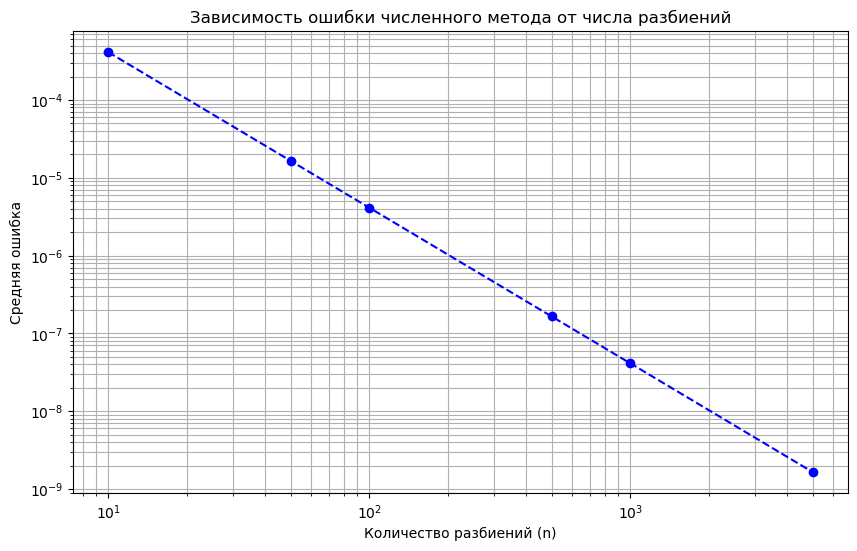

In [21]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

# Функция ошибки для численного интегрирования
def erf_numeric(x, n=1000):
    a, b = 0, x  # пределы интегрирования
    h = (b - a) / n  # шаг
    t = np.linspace(a, b, n + 1)
    y = (2 / np.sqrt(np.pi)) * np.exp(-t**2)  # функция под интегралом
    integral = h * (np.sum(y[:-1]) + np.sum(y[1:])) / 2  # метод трапеции
    return integral

# Генерация таблицы значений
x_values = np.arange(0.0, 2.1, 0.1)
erf_values_numeric = [erf_numeric(x) for x in x_values]
erf_values_exact = [erf(x) for x in x_values]

# Вывод таблицы значений
print(" x    erf через интеграл   erf табличное     Error")
for x, num, exact in zip(x_values, erf_values_numeric, erf_values_exact):
    print(f"{x:4.1f}   {num:.8f}   {exact:.8f}   {abs(num - exact):.2e}")

# Исследование зависимости ошибки от числа разбиений
n_values = [10, 50, 100, 500, 1000, 5000]
errors = []

for n in n_values:
    erf_values_numeric = [erf_numeric(x, n) for x in x_values]
    error = np.mean([abs(num - exact) for num, exact in zip(erf_values_numeric, erf_values_exact)])
    errors.append(error)

# Построение графика зависимости ошибки от числа разбиений
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors, marker="o", linestyle="--", color="b")
plt.xlabel('Количество разбиений (n)')
plt.ylabel('Средняя ошибка')
plt.title('Зависимость ошибки численного метода от числа разбиений')
plt.grid(True, which='both')
plt.show()


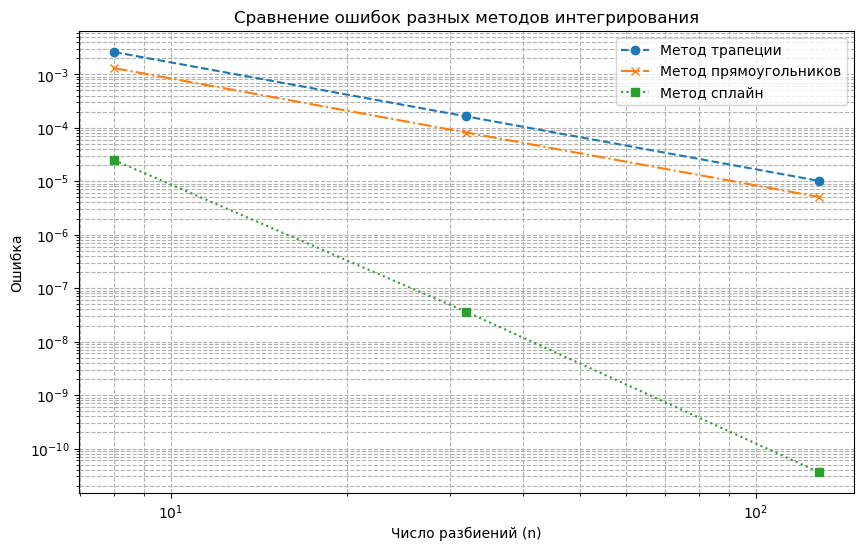

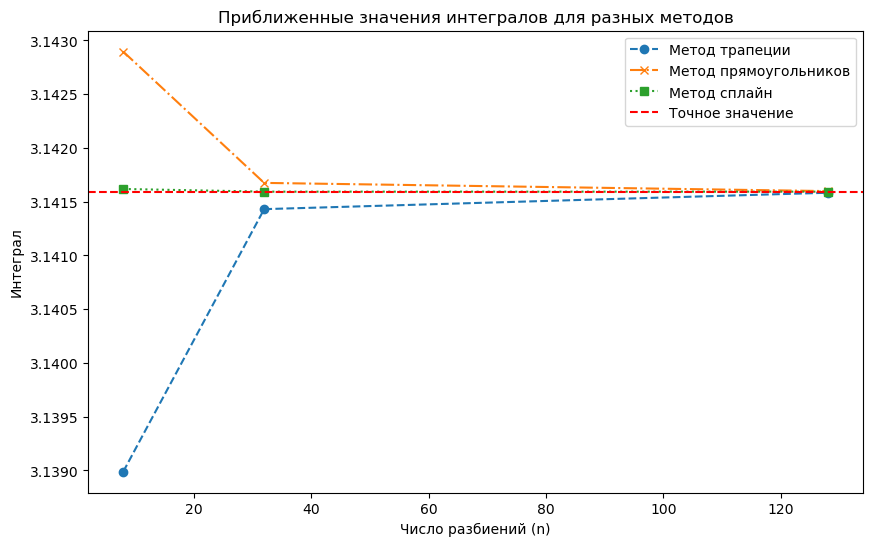

Метод интегрирования для различных n:
n     Трапеция        Error        Прямоугольники     Error       Сплайн         Error
  8   3.13898849   2.60e-03   3.14289473   1.30e-03   3.14161750   2.49e-05
 32   3.14142989   1.63e-04   3.14167403   8.14e-05   3.14159269   3.60e-08
128   3.14158248   1.02e-05   3.14159774   5.09e-06   3.14159265   3.63e-11


In [16]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Функции для интегрирования

def f_pi(x):
    return 4 / (1 + x**2)

# Метод трапеции
def integrate_trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    integral = h * (0.5 * f(x[0]) + 0.5 * f(x[-1]) + np.sum(f(x[1:-1])))
    return integral

# Метод прямоугольников
def integrate_rectangle(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b - h, n) + h / 2
    integral = h * np.sum(f(x))
    return integral

# Метод сплайн-интегрирования
def integrate_spline(f, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = f(x)
    spline = CubicSpline(x, y)
    return spline.integrate(a, b)

# Реальная точная величина интеграла для функции f(x)
def true_integral():
    return np.pi

# Основной расчет для различных методов интегрирования
n_values = [8, 32, 128]  # Количество разбиений
errors_trapezoid = []
errors_rectangle = []
errors_spline = []
integrals_trapezoid = []
integrals_rectangle = []
integrals_spline = []

for n in n_values:
    # Метод трапеции
    trapezoid_result = integrate_trapezoid(f_pi, 0, 1, n)
    integrals_trapezoid.append(trapezoid_result)
    errors_trapezoid.append(abs(true_integral() - trapezoid_result))
    
    # Метод прямоугольников
    rectangle_result = integrate_rectangle(f_pi, 0, 1, n)
    integrals_rectangle.append(rectangle_result)
    errors_rectangle.append(abs(true_integral() - rectangle_result))
    
    # Метод сплайн-интегрирования
    spline_result = integrate_spline(f_pi, 0, 1, n)
    integrals_spline.append(spline_result)
    errors_spline.append(abs(true_integral() - spline_result))

# График ошибок для разных методов
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors_trapezoid, label="Метод трапеции", marker="o", linestyle="--")
plt.loglog(n_values, errors_rectangle, label="Метод прямоугольников", marker="x", linestyle="-.")
plt.loglog(n_values, errors_spline, label="Метод сплайн", marker="s", linestyle=":")
plt.xlabel('Число разбиений (n)')
plt.ylabel('Ошибка')
plt.title('Сравнение ошибок разных методов интегрирования')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

# График приближенных значений интегралов для разных методов
plt.figure(figsize=(10, 6))
plt.plot(n_values, integrals_trapezoid, label="Метод трапеции", marker="o", linestyle="--")
plt.plot(n_values, integrals_rectangle, label="Метод прямоугольников", marker="x", linestyle="-.")
plt.plot(n_values, integrals_spline, label="Метод сплайн", marker="s", linestyle=":")
plt.axhline(y=true_integral(), color='r', linestyle='--', label="Точное значение")
plt.xlabel('Число разбиений (n)')
plt.ylabel('Интеграл')
plt.title('Приближенные значения интегралов для разных методов')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

# Вывод результатов
print("Метод интегрирования для различных n:")
print("n     Трапеция        Error        Прямоугольники     Error       Сплайн         Error")
for n, t, e_t, r, e_r, s, e_s in zip(n_values, integrals_trapezoid, errors_trapezoid, 
                                      integrals_rectangle, errors_rectangle, integrals_spline, errors_spline):
    print(f"{n:3d}   {t:.8f}   {e_t:.2e}   {r:.8f}   {e_r:.2e}   {s:.8f}   {e_s:.2e}")


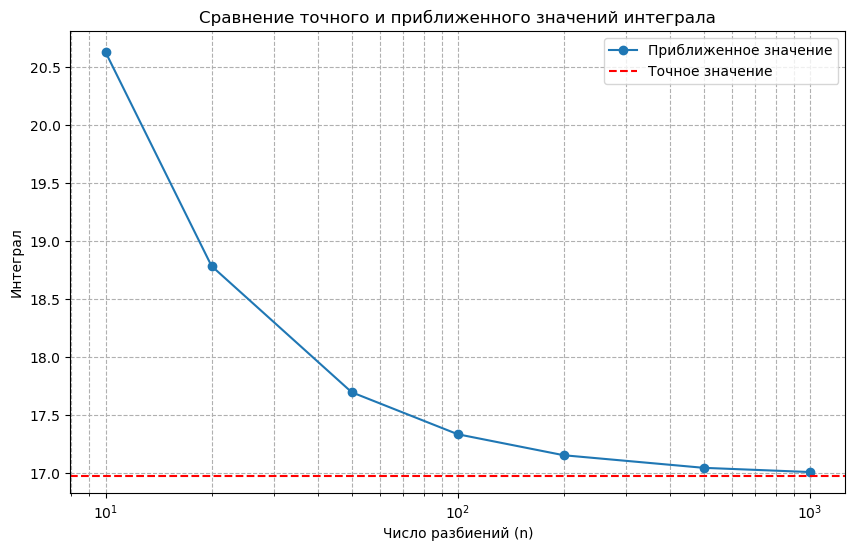

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию
def f(x):
    if 0 <= x <= 2:
        return np.exp(x ** 2)  # e^(x^2) для 0 <= x <= 2
    elif 2 < x <= 4:
        return 1 / (4 - np.sin(16 * np.pi * x))  # 1 / (4 - sin(16 * pi * x)) для 2 <= x <= 4
    else:
        return 0

# Метод Симпсона для численного интегрирования
def simpsons_method(a, b, n):
    h = (b - a) / n  # шаг
    integral = f(a) + f(b)

    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)
    for i in range(2, n - 1, 2):
        integral += 2 * f(a + i * h)

    integral *= h / 3
    return integral

# Границы интегрирования
a1, b1 = 0, 2
a2, b2 = 2, 4

# Вычисляем "точное" значение интеграла с очень большим числом разбиений
n_exact = 10000
exact_integral = simpsons_method(a1, b1, n_exact) + simpsons_method(a2, b2, n_exact)

# Сравниваем с приближенными значениями
n_values = [10, 20, 50, 100, 200, 500, 1000]
approx_integrals = []

for n in n_values:
    integral1 = simpsons_method(a1, b1, n)
    integral2 = simpsons_method(a2, b2, n)
    approx_integrals.append(integral1 + integral2)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_values, approx_integrals, 'o-', label='Приближенное значение')
plt.axhline(y=exact_integral, color='r', linestyle='--', label='Точное значение')
plt.xscale('log')
plt.xlabel('Число разбиений (n)')
plt.ylabel('Интеграл')
plt.title('Сравнение точного и приближенного значений интеграла')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()
